### 1. Loading the dataset

In [ ]:
import requests

# reading names.txt from karpath's github
path = "https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt"
response = requests.get(path)
words = response.text.splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
print(f"total names: {len(words)}")
print(f"shortest name has length: {min(len(w) for w in words)}")
print(f"longest name has length: {max(len(w) for w in words)}")

total names: 32033
shortest name has length: 2
longest name has length: 15


### 2. Creating Bigrams & visualizing


In [ ]:
# printing bigrams for first word
for w in words[:1]:
  for ch1, ch2 in zip(w, w[1:]):
    print(ch1, ch2)

e m
m m
m a


In [ ]:
# putting a start and end token in each word
for w in words[:1]:
  chs = ["<S>"] + list(w) + ["<E>"]
  for ch1, ch2 in zip(chs, chs[1:]):
    print(ch1, ch2)
# now we have bigrams which also tell us about
# starting and ending characters
# this is useful information that we will need
# in building a char level seq-2-seq model

<S> e
e m
m m
m a
a <E>


In [ ]:
# counting frequency of each bigram in the dataset
b = {}
for w in words[:2]:
  chs = ["<S>"] + list(w) + ["<E>"]
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1
b

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 2,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1}

In [ ]:
# counting frequency of each bigram in the dataset
b = {}
for w in words:
  chs = ["<S>"] + list(w) + ["<E>"]
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [ ]:
# lets sort these bigram counts
sorted(b.items(), key=lambda x: x[1])
# to sort in reverse
#sorted(b.items(), key=lambda x: -x[1])

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1),
 (('w', 'b'), 1),
 (('p', 'c'), 1),
 (('h', 'p'), 1),
 (('f', 'h'), 1),
 (('b', 'j'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('c', 'p'), 1),
 (('p', 'k'), 1),
 (('p', 'm'), 1),
 (('x', 'n'), 1),
 (('s', 'q'), 1),
 (('k', 'f'), 1),
 (('m', 'k'), 1),
 (('x', 'h'), 1),
 (('g', 'f'), 1),
 (('v', 'b'), 1),
 (('j', 'p'), 1),
 (('g', 'z'), 1),
 (('v', 'd'), 1),
 (('d', 'b'), 1),
 (('v', 'h'), 1),
 (('h', 'h'), 1),
 (('g', 'v'), 1),
 (('d', 'q'), 1),
 (('x', 'b'), 1),
 (('w', 'z'), 1),
 (('h', 'q'), 1),
 (('j', 'b'), 1),
 (('x', 'm'), 1),
 (('w', 'g'), 1),
 (('t', 'b'), 1),
 (('z', 'x'), 1),
 (('p', 'b'), 2),
 (('t', 'g'), 2),
 (('q', 's'), 2),
 (('t', 'x'), 2),
 (('f', 'k'), 2),
 (('b', 't'), 2),
 (('j', 'n'), 2),
 (('k', 'c'), 2),
 (('z', 'k'), 2),
 (('s', 'j'), 2),
 (('s', 'f'), 2),
 (('z', 'j'), 2),
 (('n', 'q

In [ ]:
import torch

In [ ]:
# briefly playing with tensors/arrays
a = torch.zeros(3,5, dtype=torch.int32)
# same as
#a = torch.zeros((3,5), dtype=torch.int32)
print(a)
print(a[1][4])
print(a[1, 4])
print(a.dtype)
# float32 -> single precision floating point numbers

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)
tensor(0, dtype=torch.int32)
tensor(0, dtype=torch.int32)
torch.int32


In [ ]:
# building the array/tensor for storing
# bigram frequencies
N = torch.zeros((27, 27), dtype=torch.int32)
chrs = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(chrs)}
stoi["."] = 0
itos = {i:s for s, i in stoi.items()}
for w in words:
  chs = ["."] + list(w) + ["."]
  for ch1, ch2 in zip(chs, chs[1:]):
    idx1 = stoi[ch1]
    idx2 = stoi[ch2]
    N[idx1][idx2] += 1

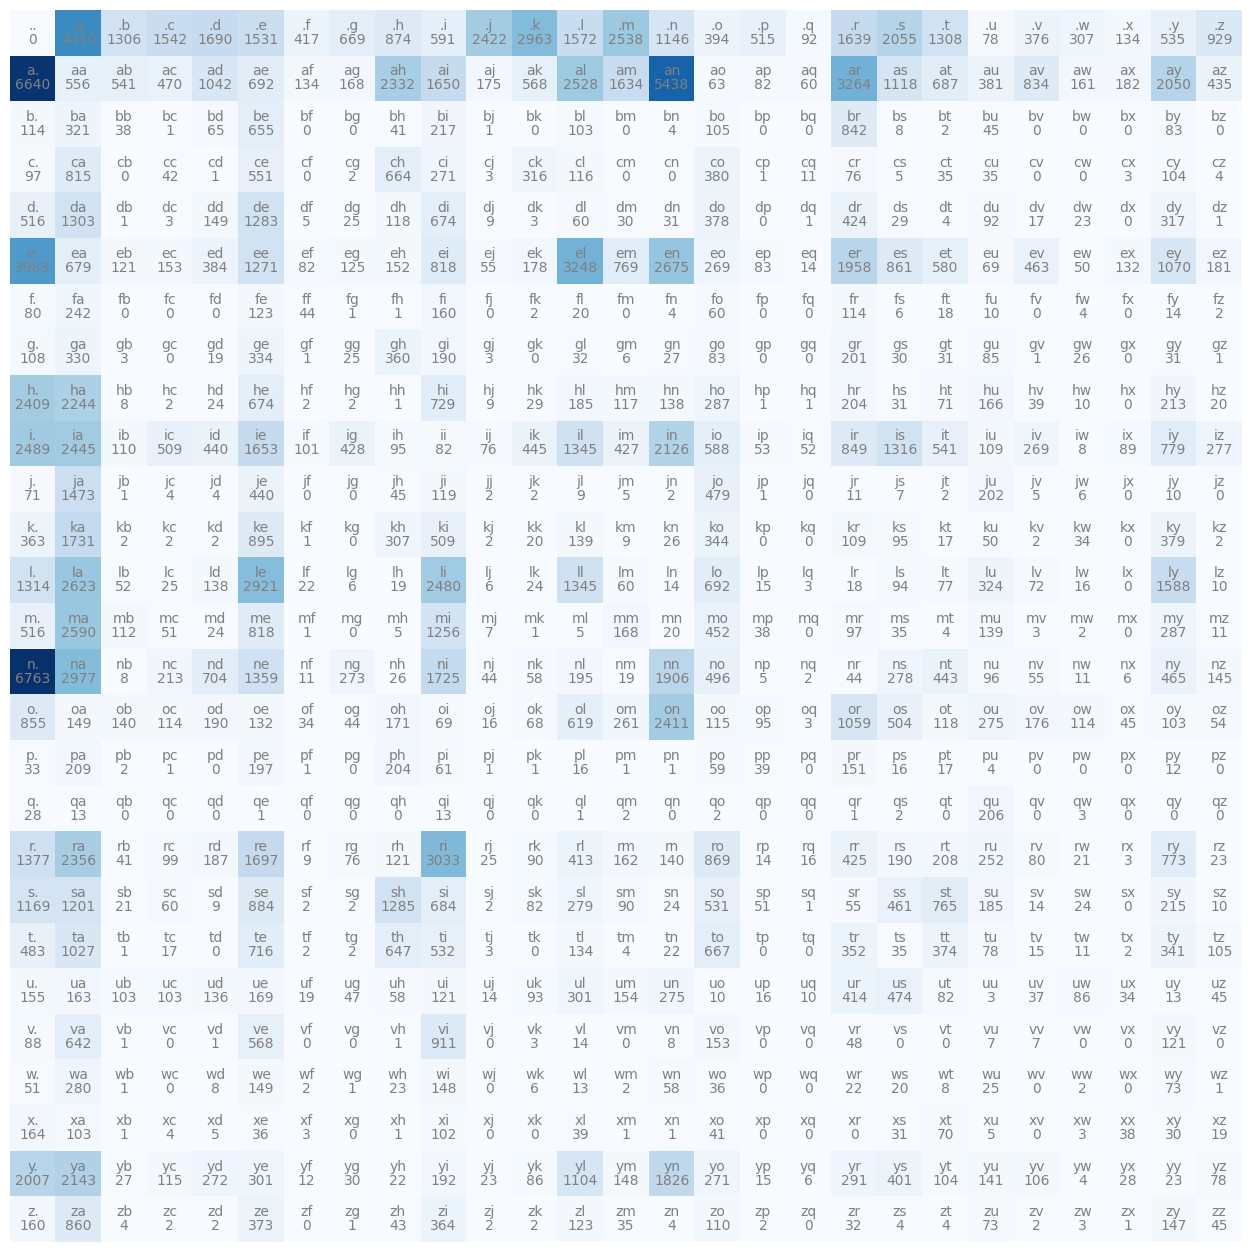

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

### 3. Creating a Bigram model

In [ ]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [ ]:
p = N[0].float()
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
p.sum()

tensor(1.)

In [ ]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p

tensor([0.7081, 0.3542, 0.1054])

In [ ]:
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [ ]:
torch.multinomial(input=p, num_samples=30, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0])

In [ ]:
g = torch.Generator().manual_seed(2147483647)

P = N.float()
P /= P.sum(dim=1, keepdim=True)

# if keepdim is not set to True
# the expression will still run
# but it will introduce a bug in the code.
# keepdim will keep the dimension and not squeeze it out
# so in this case, P.sum.shape => [27, 1]
# and shapes involved in P/P.sum => [27, 27] / [27, 1]
# broadcasting semantics rule will come into picture here
# Divident : [27, 27]
# Divisor  : [27,  1]
# therefore, end result shape using the braodcasting semantics => [27, 27]
# Whereas, if we didn't set keepdim to be True
# then, P.sum.shape => [27]
# and shapes involved in P/P.sum => [27, 27] / [27]
# broadcasting semantics rule will come into picture here
# Divident : [27, 27]
# Divisor  : [  , 27]
# therefore, end result shape using the braodcasting semantics => [27, 27]
# in both cases broadcasting semantics will allow the division
# and the end dimension will be same
# but the values will be different.
# Ref: https://docs.pytorch.org/docs/stable/notes/broadcasting.html
# check the next section for an example
# detailing how the result will be different but the dimensionality be same.
# run it like this and see the difference:
# P = P / P.sum(dim=1)
"""for idx in range(27):
  P[idx] = P[idx]/P[idx].sum()"""
for i in range(5):
  out = []
  idx = 0
  while True:
    #p = N[idx].float()
    #p = p/p.sum()
    p = P[idx]
    #p = torch.ones(27)/27.0
    idx = torch.multinomial(input=p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[idx])
    if idx == 0:
      break
  print("".join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


### 4. Understanding the sum method in torch

In [ ]:
P = torch.tensor([[1, 10], [4, 40]])
print(f"the input tensor:\n {P}")
print(f"the input tensor's shape: {P.shape}")
print("----------------------------------------------")
# PyTorch sum documentation:
# https://docs.pytorch.org/docs/stable/generated/torch.Tensor.sum.html
# https://docs.pytorch.org/docs/stable/generated/torch.sum.html

sumP = P.sum()
print(f"Summation of P with default params (dim=None, keepdim=False)")
print(f"default sum: {sumP}")
print(f"default sum's shape: {sumP.shape}")
print("----------------------------------------------")

colSumP = P.sum(dim=0)
print(f"Summation of P with params as (dim=0, keepdim=False)")
print(f"column sum: {colSumP}")
print(f"column sum's shape: {colSumP.shape}")
print("----------------------------------------------")

colSumPkeepDim = P.sum(dim=0, keepdim=True)
print(f"Summation of P with params as (dim=0, keepdim=True)")
print(f"column sum: {colSumPkeepDim}")
print(f"column sum's shape: {colSumPkeepDim.shape}")
print("----------------------------------------------")

rowSumP = P.sum(dim=1)
print(f"Summation of P with params as (dim=1, keepdim=False)")
print(f"row sum: {rowSumP}")
print(f"row sum's shape: {rowSumP.shape}")
print("----------------------------------------------")

rowSumPkeepDim = P.sum(dim=1, keepdim=True)
print(f"Summation of P with params as (dim=1, keepdim=True)")
print(f"row sum: {rowSumPkeepDim}")
print(f"row sum's shape: {rowSumPkeepDim.shape}")

the input tensor:
 tensor([[ 1, 10],
        [ 4, 40]])
the input tensor's shape: torch.Size([2, 2])
----------------------------------------------
Summation of P with default params (dim=None, keepdim=False)
default sum: 55
default sum's shape: torch.Size([])
----------------------------------------------
Summation of P with params as (dim=0, keepdim=False)
column sum: tensor([ 5, 50])
column sum's shape: torch.Size([2])
----------------------------------------------
Summation of P with params as (dim=0, keepdim=True)
column sum: tensor([[ 5, 50]])
column sum's shape: torch.Size([1, 2])
----------------------------------------------
Summation of P with params as (dim=1, keepdim=False)
row sum: tensor([11, 44])
row sum's shape: torch.Size([2])
----------------------------------------------
Summation of P with params as (dim=1, keepdim=True)
row sum: tensor([[11],
        [44]])
row sum's shape: torch.Size([2, 1])


In [ ]:
P = N.float()
print(f"the original Bigram tensor's shape: {P.shape}")
print("----------------------------------------------")
# PyTorch sum documentation:
# https://docs.pytorch.org/docs/stable/generated/torch.Tensor.sum.html
# https://docs.pytorch.org/docs/stable/generated/torch.sum.html

sumP = P.sum()
print(f"Summation of P with default params (dim=None, keepdim=False)")
print(f"default sum: {sumP}")
print(f"default sum's shape: {sumP.shape}")
print("----------------------------------------------")

colSumP = P.sum(dim=0)
print(f"Summation of P with params as (dim=0, keepdim=False)")
print(f"column sum: {colSumP}")
print(f"column sum's shape: {colSumP.shape}")
print("----------------------------------------------")

colSumPkeepDim = P.sum(dim=0, keepdim=True)
print(f"Summation of P with params as (dim=0, keepdim=True)")
print(f"column sum: {colSumPkeepDim}")
print(f"column sum's shape: {colSumPkeepDim.shape}")
print("----------------------------------------------")

rowSumP = P.sum(dim=1)
print(f"Summation of P with params as (dim=1, keepdim=False)")
print(f"row sum: {rowSumP}")
print(f"row sum's shape: {rowSumP.shape}")
print("----------------------------------------------")

rowSumPkeepDim = P.sum(dim=1, keepdim=True)
print(f"Summation of P with params as (dim=1, keepdim=True)")
print(f"row sum: {rowSumPkeepDim}")
print(f"row sum's shape: {rowSumPkeepDim.shape}")

the original Bigram tensor's shape: torch.Size([27, 27])
----------------------------------------------
Summation of P with default params (dim=None, keepdim=False)
default sum: 228146.0
default sum's shape: torch.Size([])
----------------------------------------------
Summation of P with params as (dim=0, keepdim=False)
column sum: tensor([32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
        17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
        12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.])
column sum's shape: torch.Size([27])
----------------------------------------------
Summation of P with params as (dim=0, keepdim=True)
column sum: tensor([[32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
         17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
         12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.]])
column sum's shape: torch.Size(

### 5. Understanding **Broadcasting Semanctics**

In [ ]:
a = torch.tensor([[1, 10], [4, 40]])
print(f"the a tensor:\n {a}")
print(f"the a tensor's shape: {a.shape}")
print("----------------------------------------------")

b = torch.tensor([[3], [5]])
print(f"the b tensor:\n {b}")
print(f"the b tensor's shape: {b.shape}")
print("----------------------------------------------")

c = torch.tensor([3, 5])
print(f"the c tensor:\n {c}")
print(f"the c tensor's shape: {c.shape}")
print("----------------------------------------------")

sumab = a + b
# what happens internally..
# a.shape : [2, 2]
# b.shape : [2, 1]
# 1, 10   3, 3copy     4, 13
#       +           =
# 4, 40   5, 5copy     9, 45
print(f"result of a + b :\n {sumab}")
print(f"shape of a + b : {sumab.shape}")
print("----------------------------------------------")

sumac = a + c
# what happens internally..
# a.shape : [2, 2]
# c.shape : [ , 2]
# 1, 10        3,      5     4, 15
#       +                 =
# 4, 40   3.copy, 5.copy     7, 45
print(f"result of a + c :\n {sumac}")
print(f"shape of a + c : {sumac.shape}")
print("explanation : ")
print("a.shape : [2, 2]")
print("c.shape : [ , 2]")
print("1, 10   3,      5          4, 15")
print("        +               =")
print("4, 40   3.copy, 5.copy     7, 45")


the a tensor:
 tensor([[ 1, 10],
        [ 4, 40]])
the a tensor's shape: torch.Size([2, 2])
----------------------------------------------
the b tensor:
 tensor([[3],
        [5]])
the b tensor's shape: torch.Size([2, 1])
----------------------------------------------
the c tensor:
 tensor([3, 5])
the c tensor's shape: torch.Size([2])
----------------------------------------------
result of a + b :
 tensor([[ 4, 13],
        [ 9, 45]])
shape of a + b : torch.Size([2, 2])
----------------------------------------------
result of a + c :
 tensor([[ 4, 15],
        [ 7, 45]])
shape of a + c : torch.Size([2, 2])
explanation : 
a.shape : [2, 2]
c.shape : [ , 2]
1, 10   3,      5          4, 15
        +               =
4, 40   3.copy, 5.copy     7, 45


### 6. Evaluating the Bigram model.

In [ ]:
# we need a loss function to evaluate the goodness of the model
# a loss function calculates the loss btw ground truth & predictions
# the lower the loss, better the model
# higher the loss, worse the model.
# The job of training is:
#   to find the parameters
#   that minimize the loss

# likelihood = product of all the probabilities
# likelihood = a*b*c
# log_likelihood = log(likelihood)
# log_likelihood = log (a*b*c)
# log_likelihood = log(a) + log(b) + log(c)

# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood


log_likelihood = 0
n = 0
for w in words:
  chs = ["."] + list(w) + ["."]
  for ch1, ch2 in zip(chs, chs[1:]):
    idx1 = stoi[ch1]
    idx2 = stoi[ch2]
    prob = P[idx1, idx2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")
print(f"{log_likelihood=}")
nll = - log_likelihood
print(f"{nll=}")
print(f"normalized nll: {nll/n}")

log_likelihood=tensor(1610948.5000)
nll=tensor(-1610948.5000)
normalized nll: -7.061041831970215


### 7. Model smoothing

In [ ]:
# checking probability for my name
# and prepending c to it and checking again
log_likelihood = 0
n = 0
for w in ["cnirbhai"]:
  chs = ["."] + list(w) + ["."]
  for ch1, ch2 in zip(chs, chs[1:]):
    idx1 = stoi[ch1]
    idx2 = stoi[ch2]
    prob = P[idx1, idx2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")
print(f"{log_likelihood=}")
nll = - log_likelihood
print(f"{nll=}")
print(f"normalized nll: {nll/n}")

.c: 1542.0000 7.3408
cn: 0.0000 -inf
ni: 1725.0000 7.4530
ir: 849.0000 6.7441
rb: 41.0000 3.7136
bh: 41.0000 3.7136
ha: 2244.0000 7.7160
ai: 1650.0000 7.4085
i.: 2489.0000 7.8196
log_likelihood=tensor(-inf)
nll=tensor(inf)
normalized nll: inf


#### Observations
- We notice if we prepend it with c.
- The probability becomes 0 and Nnll becomes infinity.
- That is undesirable, because cnirbhai is very close to nirbhai.
- Meaning, it's not completely unheard of. Like, jack and jak or jac.
- If we inspect the biagram probabilities in above cell, we will notice cn has zero probability.
- That is why overall word has zero probability.
- Further inspection of bigram visualization will tell us, that whichever bigram has zero probability, when occurs in a word, that word will have zero probability according to this bigram model.
- So, to take care of it, we perform model smoothing.


In [ ]:
g = torch.Generator().manual_seed(2147483647)

smoothing_factor = 1
P = (N + smoothing_factor).float()
P /= P.sum(dim=1, keepdim=True)

for i in range(5):
  out = []
  idx = 0
  while True:
    p = P[idx]
    idx = torch.multinomial(input=p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[idx])
    if idx == 0:
      break
  print("".join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [ ]:
# checking probability for my name
# and prepending c to it and checking again
log_likelihood = 0
n = 0
for w in ["cnirbhai"]:
  chs = ["."] + list(w) + ["."]
  for ch1, ch2 in zip(chs, chs[1:]):
    idx1 = stoi[ch1]
    idx2 = stoi[ch2]
    prob = P[idx1, idx2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")
print(f"{log_likelihood=}")
nll = - log_likelihood
print(f"{nll=}")
print(f"normalized nll: {nll/n}")

.c: 0.0481 -3.0339
cn: 0.0003 -8.1772
ni: 0.0940 -2.3640
ir: 0.0479 -3.0377
rb: 0.0033 -5.7138
bh: 0.0157 -4.1529
ha: 0.2937 -1.2251
ai: 0.0487 -3.0224
i.: 0.1405 -1.9629
log_likelihood=tensor(-32.6899)
nll=tensor(32.6899)
normalized nll: 3.632208824157715


### 8. Moving towards a bigram neural network

In [ ]:
# create the training set of bigrams (X, y)
X, y = [], []

for w in words[:1]:
  chs = ["."] + list(w) + ["."]
  for ch1, ch2 in zip(chs, chs[1:]):
    idx1 = stoi[ch1]
    idx2 = stoi[ch2]
    X.append(idx1)
    y.append(idx2)
    print(ch1, ch2)

# torch.Tensor creates a tensor of ftype float32
# and torch.tensor created a tensor of whatever type is of the input data.
X = torch.tensor(X)
y = torch.tensor(y)
print(X)
print(y)

. e
e m
m m
m a
a .
tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [ ]:
import torch.nn.functional as F
X_enc = F.one_hot(X, num_classes=27).float()
y_enc = F.one_hot(y, num_classes=27).float()
# torch.nn.functional.one_hot always returns the tensor of dtype=LongInt=int64
X_enc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
X_enc.shape

torch.Size([5, 27])

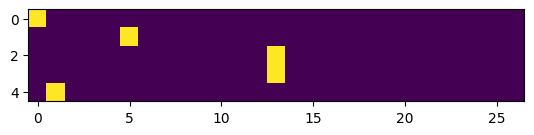

In [ ]:
plt.imshow(X_enc)

In [ ]:
X_enc.dtype

torch.float32

In [ ]:
W = torch.randn((27, 1))
W

tensor([[-0.4263],
        [-0.3962],
        [ 0.5452],
        [-0.3131],
        [ 0.5855],
        [-0.9190],
        [-1.9497],
        [-1.8028],
        [-0.6279],
        [ 1.2987],
        [ 1.1228],
        [-0.4570],
        [ 1.1143],
        [-0.4214],
        [ 0.1036],
        [-1.0309],
        [-1.1763],
        [-1.6858],
        [ 1.5888],
        [ 2.4010],
        [-0.6747],
        [-0.9125],
        [ 1.8811],
        [ 0.2151],
        [-0.6392],
        [ 0.3394],
        [ 1.1195]])

In [ ]:
X_enc @ W

tensor([[-0.4263],
        [-0.9190],
        [-0.4214],
        [-0.4214],
        [-0.3962]])

In [ ]:
# @ is matrix multiplication in PyTorch
# matrix multiplication of:
#     a x b matrix with b x c matrix
# will result in:
#     a x c matrix

#     X_enc :  5, 27
#         W : 27, 1
# X_enc @ W :  5, 1

In [ ]:
W = torch.randn((27, 27))
W

tensor([[-4.5623e-01,  4.7779e-01,  8.9920e-01,  1.2549e+00,  7.3789e-01,
         -1.7661e+00,  7.2793e-01,  3.6382e-01, -1.1844e+00, -3.0509e+00,
          6.5004e-01, -2.7079e+00,  2.0148e+00,  5.5118e-01, -1.0635e+00,
          7.7460e-02,  7.5880e-01, -2.5464e-02, -8.9601e-02, -5.6263e-01,
          1.6622e+00, -1.5615e+00, -1.8519e-01,  8.8275e-01,  6.1128e-01,
         -8.1559e-02,  5.4885e-01],
        [ 8.4594e-01,  1.6732e+00, -6.4748e-01,  4.1821e-02, -1.0548e+00,
         -7.5917e-01, -3.4858e-01, -4.3712e-01, -4.3794e-01, -1.1742e+00,
          1.1090e-01, -4.0604e-01, -3.0604e-01,  2.3560e-01,  3.9364e-01,
          1.0734e+00,  2.5937e-01, -1.4887e+00,  4.3889e-01, -1.3701e+00,
         -1.7341e+00,  2.3705e+00, -3.9097e-01,  1.7378e+00, -1.2876e+00,
          2.1319e-01, -8.2813e-01],
        [-2.9673e-02, -6.0625e-03,  2.2817e-01,  1.5159e+00, -1.5064e+00,
         -7.0323e-01,  7.4775e-02,  5.8392e-01,  9.6535e-01, -2.1151e+00,
          1.0762e+00,  3.5864e-01, -4.23

In [ ]:
(X_enc @ W)[3, 13]

tensor(0.3287)

In [ ]:
X_enc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
W[: ,13]

tensor([ 0.5512,  0.2356, -0.9248, -1.6110,  0.1983, -0.1757,  1.3254,  1.2120,
        -1.5115,  0.4525,  0.3665, -0.7253, -1.2028,  0.3287,  1.4941,  0.3429,
         1.1010, -0.7015,  0.4118, -0.4177, -0.2406, -0.1354, -0.4223, -0.2294,
        -1.7187, -1.0201, -0.8807])

In [ ]:
(X_enc[3]*W[: ,13]).sum()

tensor(0.3287)

In [ ]:
X_enc @ W

tensor([[-4.5623e-01,  4.7779e-01,  8.9920e-01,  1.2549e+00,  7.3789e-01,
         -1.7661e+00,  7.2793e-01,  3.6382e-01, -1.1844e+00, -3.0509e+00,
          6.5004e-01, -2.7079e+00,  2.0148e+00,  5.5118e-01, -1.0635e+00,
          7.7460e-02,  7.5880e-01, -2.5464e-02, -8.9601e-02, -5.6263e-01,
          1.6622e+00, -1.5615e+00, -1.8519e-01,  8.8275e-01,  6.1128e-01,
         -8.1559e-02,  5.4885e-01],
        [ 1.3729e+00, -9.1499e-01, -5.0667e-01, -6.5613e-01,  1.1140e+00,
         -5.0301e-01,  6.2886e-01,  1.6814e+00, -1.0375e+00,  4.4030e-01,
          7.5446e-01, -4.8183e-01, -7.3119e-01, -1.7570e-01,  1.0519e+00,
          2.9578e-01, -1.2229e-03,  4.6547e-01,  7.9545e-01,  9.0553e-01,
         -2.6377e-01, -9.6426e-01,  1.3700e+00, -9.5087e-01, -6.4019e-01,
         -5.6443e-01, -2.0336e+00],
        [ 2.4709e+00,  2.3002e-01,  6.7841e-02, -1.4744e+00,  8.4110e-01,
          3.2628e-01, -8.1410e-01, -4.9395e-02,  4.3893e-03,  7.2929e-01,
          1.0989e+00, -7.4669e-01, -6.07

In [ ]:
(X_enc @ W).exp()

tensor([[ 0.6337,  1.6125,  2.4576,  3.5074,  2.0915,  0.1710,  2.0708,  1.4388,
          0.3059,  0.0473,  1.9156,  0.0667,  7.4990,  1.7353,  0.3452,  1.0805,
          2.1357,  0.9749,  0.9143,  0.5697,  5.2711,  0.2098,  0.8309,  2.4175,
          1.8428,  0.9217,  1.7313],
        [ 3.9466,  0.4005,  0.6025,  0.5189,  3.0466,  0.6047,  1.8755,  5.3733,
          0.3543,  1.5532,  2.1265,  0.6176,  0.4813,  0.8389,  2.8629,  1.3442,
          0.9988,  1.5928,  2.2154,  2.4732,  0.7681,  0.3813,  3.9353,  0.3864,
          0.5272,  0.5687,  0.1309],
        [11.8333,  1.2586,  1.0702,  0.2289,  2.3189,  1.3858,  0.4430,  0.9518,
          1.0044,  2.0736,  3.0010,  0.4739,  0.5448,  1.3891,  3.0789,  0.3180,
          1.3891,  0.3523,  1.0817,  0.3252,  1.1094,  5.2998,  3.5332,  0.6493,
          0.5905,  1.7901,  0.4705],
        [11.8333,  1.2586,  1.0702,  0.2289,  2.3189,  1.3858,  0.4430,  0.9518,
          1.0044,  2.0736,  3.0010,  0.4739,  0.5448,  1.3891,  3.0789,  0.3180

In [ ]:
logits = X_enc @ W # log-counts
counts = logits.exp() # equivalent N from earlier
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0141, 0.0360, 0.0549, 0.0783, 0.0467, 0.0038, 0.0462, 0.0321, 0.0068,
         0.0011, 0.0428, 0.0015, 0.1674, 0.0387, 0.0077, 0.0241, 0.0477, 0.0218,
         0.0204, 0.0127, 0.1177, 0.0047, 0.0185, 0.0540, 0.0411, 0.0206, 0.0386],
        [0.0974, 0.0099, 0.0149, 0.0128, 0.0752, 0.0149, 0.0463, 0.1326, 0.0087,
         0.0383, 0.0525, 0.0152, 0.0119, 0.0207, 0.0706, 0.0332, 0.0246, 0.0393,
         0.0547, 0.0610, 0.0190, 0.0094, 0.0971, 0.0095, 0.0130, 0.0140, 0.0032],
        [0.2467, 0.0262, 0.0223, 0.0048, 0.0483, 0.0289, 0.0092, 0.0198, 0.0209,
         0.0432, 0.0626, 0.0099, 0.0114, 0.0290, 0.0642, 0.0066, 0.0290, 0.0073,
         0.0226, 0.0068, 0.0231, 0.1105, 0.0737, 0.0135, 0.0123, 0.0373, 0.0098],
        [0.2467, 0.0262, 0.0223, 0.0048, 0.0483, 0.0289, 0.0092, 0.0198, 0.0209,
         0.0432, 0.0626, 0.0099, 0.0114, 0.0290, 0.0642, 0.0066, 0.0290, 0.0073,
         0.0226, 0.0068, 0.0231, 0.1105, 0.0737, 0.0135, 0.0123, 0.0373, 0.0098],
        [0.0541, 0.1238,

In [ ]:
probs[0].sum()

tensor(1.0000)

Summarizing from above

In [ ]:
# the input tensor
X

tensor([ 0,  5, 13, 13,  1])

In [ ]:
# the label tensor
y

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [ ]:
xenc = F.one_hot(X, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [ ]:
# this is for ".emma."
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  Xi = X[i].item() # input character index
  yi = y[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[Xi]}{itos[yi]} (indexes {Xi},{yi})')
  print('input to the neural net:', Xi)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', yi)
  p = probs[i, yi]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

Optimizing the neural network

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
# forward pass
X_enc = F.one_hot(X, num_classes=27).float() # input to the network: one-hot encoding
logits = X_enc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# here, probs can be thought of as y_pred
loss = -probs[torch.arange(5), y].log().mean() # normalized negative log likelihood
loss

tensor(0.3150, grad_fn=<NegBackward0>)

In [ ]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [ ]:
# update the weights
W.data += -10 * W.grad

### Bigram Neural Network

In [ ]:
# creating the dataset
X, y = [], []
for w in words:
  chs = ["."] + list(w) + ["."]
  for ch1, ch2 in zip(chs, chs[1:]):
    idx1 = stoi[ch1]
    idx2 = stoi[ch2]
    X.append(idx1)
    y.append(idx2)
X = torch.tensor(X)
y = torch.tensor(y)
num = X.nelement()
print("number of examples: ", num)

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

# gradient descent
for k in range(500):

  # forward pass
  # input to the network is one-hot encoded
  X_enc = F.one_hot(X, num_classes=27).float()
  # predict log-counts
  logits = X_enc @ W
  # find the counts by exponentiation, equivalent to N from above
  counts = logits.exp()
  # find probabilities for the next character, equivalent to y_pred
  probs = counts/counts.sum(dim=1, keepdim=True)
  # calculate the loss: normalized negative log likelihood
  loss = - probs[torch.arange(num), y].log().mean()
  print(loss.item())

  # backward pass
  # flush the gradient before backward pass
  W.grad = None
  # recalculate the gradients
  loss.backward()

  # update the network params
  W.data += -50 * W.grad

number of examples:  228146
3.758953809738159
3.371100425720215
3.1540427207946777
3.020373582839966
2.927711009979248
2.8604023456573486
2.8097288608551025
2.7701022624969482
2.7380728721618652
2.711496591567993
2.6890032291412354
2.6696884632110596
2.65293025970459
2.638277769088745
2.6253879070281982
2.613990545272827
2.60386323928833
2.5948219299316406
2.5867116451263428
2.5794036388397217
2.572789192199707
2.5667762756347656
2.5612878799438477
2.5562586784362793
2.551633596420288
2.547365665435791
2.543415069580078
2.5397486686706543
2.536336660385132
2.5331544876098633
2.5301804542541504
2.5273969173431396
2.5247862339019775
2.522334337234497
2.520028829574585
2.517857789993286
2.515810966491699
2.513878345489502
2.512052059173584
2.5103237628936768
2.5086872577667236
2.5071349143981934
2.5056614875793457
2.5042612552642822
2.5029289722442627
2.5016608238220215
2.5004520416259766
2.4992988109588623
2.498197317123413
2.4971446990966797
2.4961376190185547
2.495173692703247
2.494249

### 10. The learned wights matrix W ~= calculated N matrix


In [ ]:
N.shape

torch.Size([27, 27])

In [ ]:
W.shape

torch.Size([27, 27])

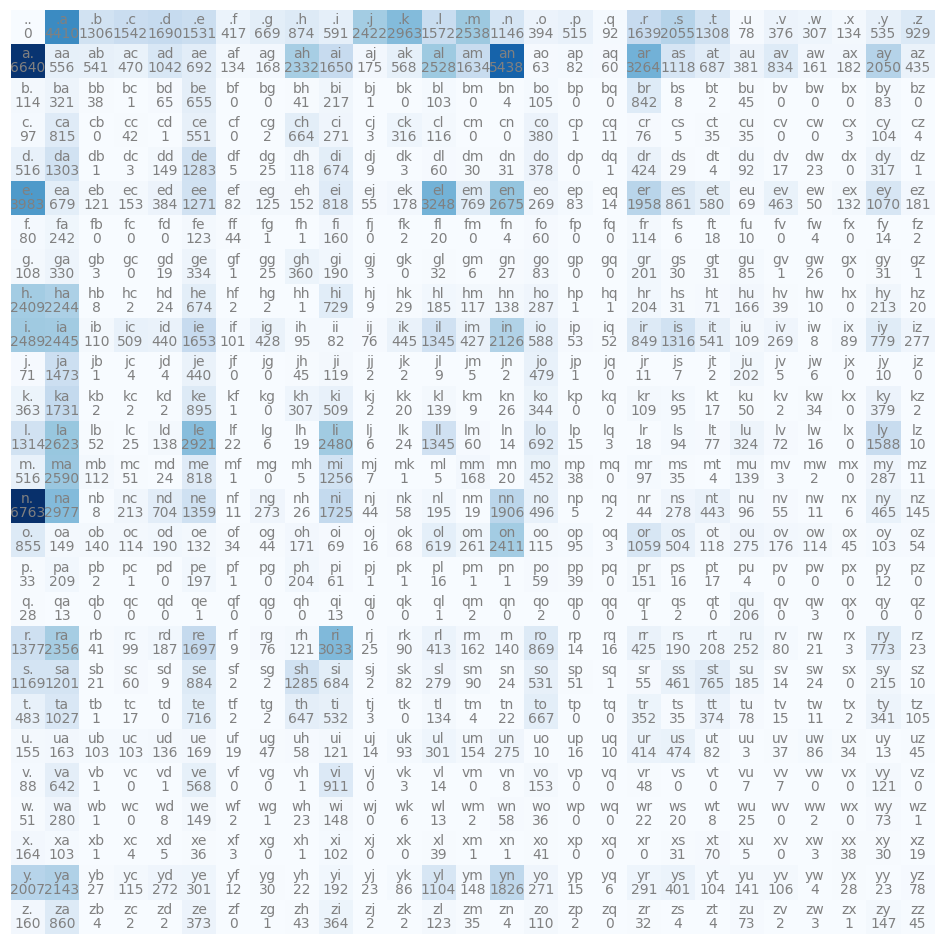

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

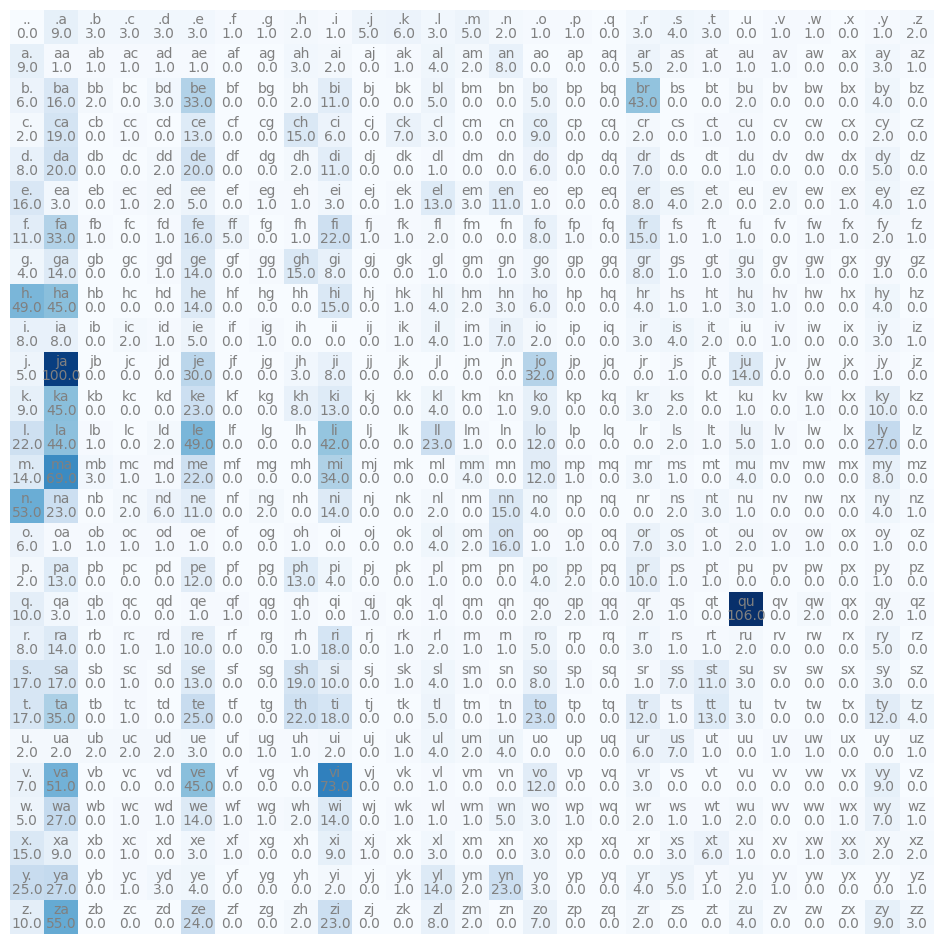

In [ ]:
N_apprx = torch.round(W.exp()).detach().numpy()
plt.figure(figsize=(12,12))
plt.imshow(N_apprx, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N_apprx[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

### 11. Weight's matrix initiation. How does it affect the neural network? What's it analogous action in the bigram calculation method at top?

### 12. Regularization


In [ ]:
# creating the dataset
X, y = [], []
for w in words:
  chs = ["."] + list(w) + ["."]
  for ch1, ch2 in zip(chs, chs[1:]):
    idx1 = stoi[ch1]
    idx2 = stoi[ch2]
    X.append(idx1)
    y.append(idx2)
X = torch.tensor(X)
y = torch.tensor(y)
num = X.nelement()
print("number of examples: ", num)

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

# gradient descent
for k in range(200):

  # forward pass
  # input to the network is one-hot encoded
  X_enc = F.one_hot(X, num_classes=27).float()
  # predict log-counts
  logits = X_enc @ W
  # find the counts by exponentiation, equivalent to N from above
  counts = logits.exp()
  # find probabilities for the next character, equivalent to y_pred
  probs = counts/counts.sum(dim=1, keepdim=True)
  # calculate the loss: normalized negative log likelihood
  loss = - probs[torch.arange(num), y].log().mean()
  # adding regularization
  regularization_rate = 0.01
  regularization_loss = regularization_rate*(W**2).mean()
  loss += regularization_loss
  # or simply
  #loss = - probs[torch.arange(num), y].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  # backward pass
  # flush the gradient before backward pass
  W.grad = None
  # recalculate the gradients
  loss.backward()

  # update the network params
  W.data += -50 * W.grad

number of examples:  228146
3.7686190605163574
3.3788065910339355
3.16109037399292
3.0271859169006348
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146339416504
2.7452542781829834
2.7188303470611572
2.696505546569824
2.6773719787597656
2.6608052253723145
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886809825897217
2.5822560787200928
2.5764293670654297
2.5711236000061035
2.5662729740142822
2.5618228912353516
2.5577263832092285
2.5539441108703613
2.550442695617676
2.5471925735473633
2.5441696643829346
2.5413522720336914
2.538722038269043
2.536262035369873
2.5339581966400146
2.531797409057617
2.529768228530884
2.527859926223755
2.5260636806488037
2.5243701934814453
2.522773265838623
2.52126407623291
2.519836902618408
2.5184857845306396
2.5172054767608643
2.515990734100342
2.5148372650146484
2.5137407779693604
2.512697696685791
2.511704921722412
2.5107581615448
2.509854555130005
2.5089924335479736
2.5081682

### 12. Sampling from the neural network or generating using neural network

In [ ]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.


- The output above is same as the non-neural-net model from top.
- This further cements that these are same models in the endstate.
- The way we reached at the end-state is much different.
- And the second way, the neural net way is much more flexible & scalable as compared to storing the counts in a matrix way.